# Tier 2. Module 4 - Deep Learning. Homework

## Lessons 1-4: The basics of PyTorch. NN for Regression

The task is focused on the practical application of neural networks to solve a real problem in the field of construction. It is necessary to develop a dataset "[Concrete Strength Prediction](https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength)", which contains information about various factors that affect the strength of concrete.

The task is to develop a deep learning model to predict the strength of concrete based on its constituent components and other factors.

It is necessary:

1. Conduct preliminary data analysis, including visualization and statistical description.
2. Prepare data for model training (normalization, coding of categorical variables, etc.).
3. Develop and train a neural network model for concrete strength prediction.
4. Evaluate the effectiveness of the model using appropriate metrics.
5. Analyze the results and draw conclusions about the most important factors affecting the strength of concrete.

The model must take into account various predictors such as the materials used, the age of the concrete, and other factors represented in the data set.


### 1. Import of the required libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport

### 2. Data preparation


#### 2.1. Dataset uploading


In [2]:
data = pd.read_csv("./didactic/data/ConcreteStrengthData.csv")
data.shape

(1030, 9)

In [3]:
data.head()

CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0             540.0               0.0              0.0           162.0   
1             540.0               0.0              0.0           162.0   
2             332.5             142.5              0.0           228.0   
3             332.5             142.5              0.0           228.0   
4             198.6             132.4              0.0           192.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        2.5                    1040.0   
1                        2.5                    1055.0   
2                        0.0                     932.0   
3                        0.0                     932.0   
4                        0.0                     978.4   

   FineAggregateComponent  AgeInDays  Strength  
0                   676.0         28     79.99  
1                   676.0         28     61.89  
2                   594.0        270     40.27  
3                   594.0        365     41.05  
4                   825.5        360     44.30

#### 2.2. EDA


In [54]:
report = ProfileReport(data)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


All features in this data set are numeric, so feature encoding is not required.


In [6]:
data.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

There are also no missing values in this data set.


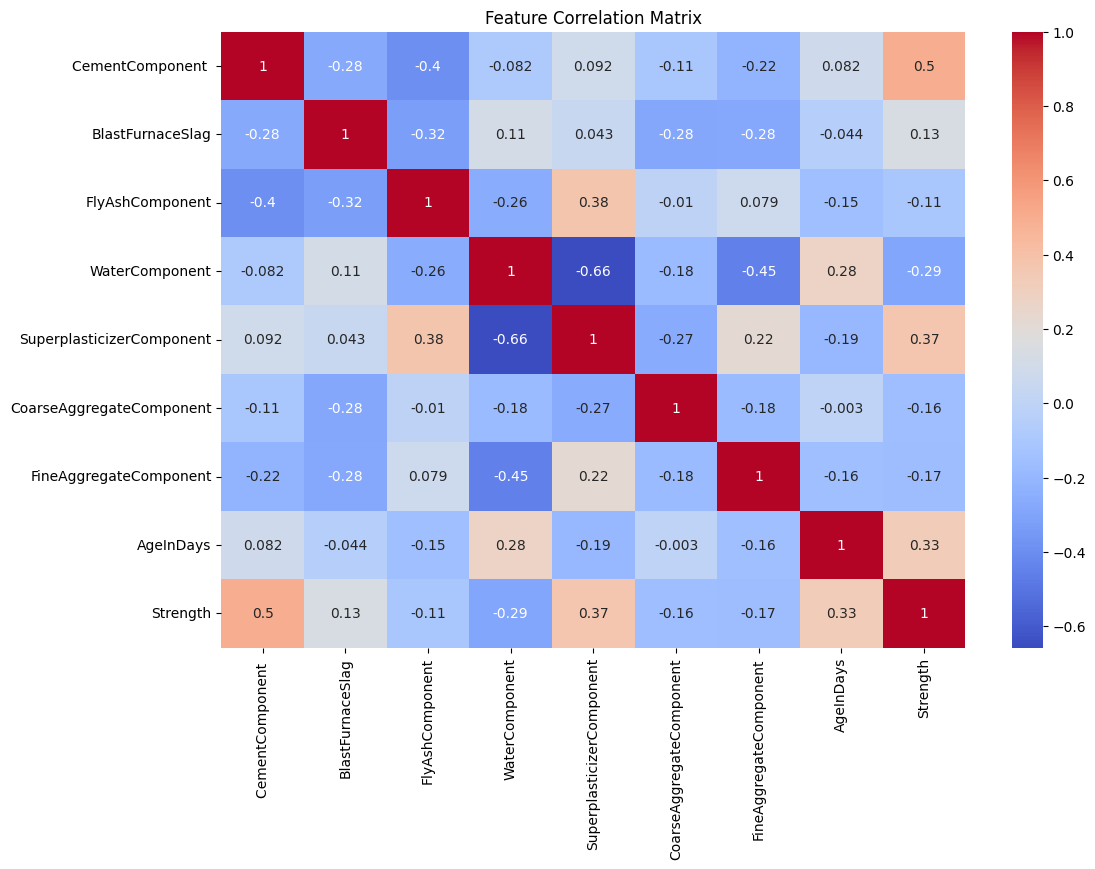

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

There are two features with -0.66 correlation between them, but it's not too high and we can ignore it.


In [8]:
data.drop("WaterComponent", axis=1)

CementComponent   BlastFurnaceSlag  FlyAshComponent  \
0                540.0               0.0              0.0   
1                540.0               0.0              0.0   
2                332.5             142.5              0.0   
3                332.5             142.5              0.0   
4                198.6             132.4              0.0   
...                ...               ...              ...   
1025             276.4             116.0             90.3   
1026             322.2               0.0            115.6   
1027             148.5             139.4            108.6   
1028             159.1             186.7              0.0   
1029             260.9             100.5             78.3   

      SuperplasticizerComponent  CoarseAggregateComponent  \
0                           2.5                    1040.0   
1                           2.5                    1055.0   
2                           0.0                     932.0   
3                           0.0                     932.0   
4                           0.0                     978.4   
...                         ...                       ...   
1025                        8.9                     870.1   
1026                       10.4                     817.9   
1027                        6.1                     892.4   
1028                       11.3                     989.6   
1029                        8.6                     864.5   

      FineAggregateComponent  AgeInDays  Strength  
0                      676.0         28     79.99  
1                      676.0         28     61.89  
2                      594.0        270     40.27  
3                      594.0        365     41.05  
4                      825.5        360     44.30  
...                      ...        ...       ...  
1025                   768.3         28     44.28  
1026                   813.4         28     31.18  
1027                   780.0         28     23.70  
1028                   788.9         28     32.77  
1029                   761.5         28     32.40  

[1030 rows x 8 columns]

#### 2.3. Target and features split


In [9]:
TARGET = "Strength"
FEATURES = [col for col in data.columns if col != TARGET]

X = data[FEATURES]
y = data[TARGET]

#### 2.4. Training and test split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### 2.5. Data Normalization


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.6. Convertion to PyTorch tensors


In [12]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

### 3. Creating a model


Creating a model with simple architecture and only 3 layers.


In [13]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
simple_model = SimpleNN(X_train_tensor.shape[1])

#### 4. Learning Settings


#### 4.1. Loss function selection


Mean Squared Error (MSE) was chosen as the loss function because it calculates the actual deviations between continuous predicted and target values ​​by squaring the error, which allows for more penalties for larger deviations.


In [15]:
criterion = nn.MSELoss()

#### 4.2. Optimizer selection


To begin with, the Stochastic Gradient Descent (SGD) was chosed as the optimizer. Then we can try to replace him with Adam and compare the results.


In [16]:
sgd_optimizer = optim.SGD(simple_model.parameters(), lr=0.01)

#### 4.3. Hyperparameters selection


In [17]:
learning_rate = 0.01
num_epochs = 100

### 5. Model Training


In [18]:
train_loss = [] 
test_loss = []

In [19]:
def train_model(
    model: SimpleNN, learning_rate: float, num_epochs: int, optimizer: str = "sgd"
):
    if optimizer == "adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    else:
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    criterion = nn.MSELoss()

    for epoch in range(num_epochs):
        model.train()

        predictions = model(X_train_tensor)

        loss = criterion(predictions, y_train_tensor)
        train_loss.append(loss.cpu().detach().numpy())

        optimizer.zero_grad()  # Zero out gradients from the previous step
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

        model.eval()
        with torch.no_grad():  # Context to guarantee no gradient calculation on test data
            predictions = model(X_test_tensor)

            loss = criterion(predictions, y_test_tensor)  # no optimization step on trst data
            test_loss.append(loss.cpu().detach().numpy())

In [20]:
train_model(simple_model, learning_rate, num_epochs, "adam")

Epoch [10/100], Loss: 1109.3898
Epoch [20/100], Loss: 261.6008
Epoch [30/100], Loss: 209.7578
Epoch [40/100], Loss: 199.6260
Epoch [50/100], Loss: 167.8193
Epoch [60/100], Loss: 149.0587
Epoch [70/100], Loss: 139.2547
Epoch [80/100], Loss: 132.7505
Epoch [90/100], Loss: 127.3998
Epoch [100/100], Loss: 122.8455


### 6. Model evaluation


In [21]:
def evaluate_model(model: SimpleNN):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        mse = nn.MSELoss()(predictions, y_test_tensor).item()
        mae = torch.mean(torch.abs(predictions - y_test_tensor)).item()
        r2 = 1 - mse / torch.var(y_test_tensor).item()

    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return predictions

In [22]:
predictions = evaluate_model(simple_model)

MSE: 115.4645
MAE: 8.8188
R² Score: 0.5541


The accuracy of the model is significantly different from the desired one. Let's try to complicate the model and change the hyperparameters.


### 7. Results visualization and analysis


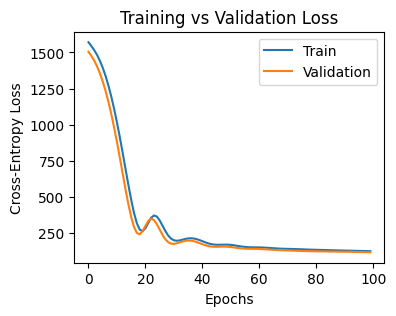

In [23]:
def show_los():
    plt.figure(figsize=(4, 3))
    plt.plot(train_loss, label="Train")
    plt.plot(test_loss, label="Validation")
    plt.legend(loc="best")
    plt.xlabel("Epochs")
    plt.ylabel("Cross-Entropy Loss")
    plt.title("Training vs Validation Loss")
    plt.show()

show_los()

After sixty epochs, the model stops learning and reaches a plateau with no signs under or overfitting. This suggests that the model is not complex enough and can still be improved.

### 8. Model Optimization


Let's improve the model by adding one layer and doubling the number of neurons. Let's replace the optimizer with Adam, which, although slower, achieves better convergence than SGD. At the same time, we will reduce the learning step to simplify the search for the minimum of the loss function, and increase the number of learning epochs.

Epoch [10/2000], Loss: 1532.4468
Epoch [20/2000], Loss: 1503.7551
Epoch [30/2000], Loss: 1462.8137
Epoch [40/2000], Loss: 1404.9114
Epoch [50/2000], Loss: 1327.2112
Epoch [60/2000], Loss: 1228.0557
Epoch [70/2000], Loss: 1106.9288
Epoch [80/2000], Loss: 966.0862
Epoch [90/2000], Loss: 811.7916
Epoch [100/2000], Loss: 654.4897
Epoch [110/2000], Loss: 508.3135
Epoch [120/2000], Loss: 389.2791
Epoch [130/2000], Loss: 307.7475
Epoch [140/2000], Loss: 262.1200
Epoch [150/2000], Loss: 240.1619
Epoch [160/2000], Loss: 228.5680
Epoch [170/2000], Loss: 220.1226
Epoch [180/2000], Loss: 212.9461
Epoch [190/2000], Loss: 206.8384
Epoch [200/2000], Loss: 201.5240
Epoch [210/2000], Loss: 196.7568
Epoch [220/2000], Loss: 192.4120
Epoch [230/2000], Loss: 188.4021
Epoch [240/2000], Loss: 184.6753
Epoch [250/2000], Loss: 181.1992
Epoch [260/2000], Loss: 177.9524
Epoch [270/2000], Loss: 174.9139
Epoch [280/2000], Loss: 172.0629
Epoch [290/2000], Loss: 169.3474
Epoch [300/2000], Loss: 166.7702
Epoch [310/2

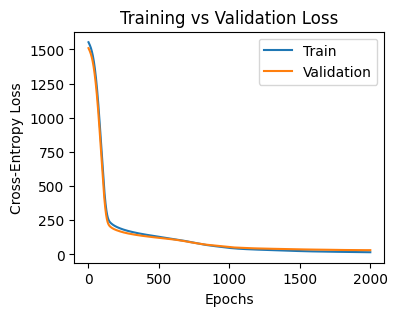

In [53]:
class AnvancedNN(nn.Module):
    def __init__(self, input_size):
        super(AnvancedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
advanced_model = SimpleNN(X_train_tensor.shape[1])

train_loss = [] 
test_loss = []

train_accs = []
test_accs = []

train_model(advanced_model, 0.001, 2000, "adam")

predictions = evaluate_model(advanced_model)

show_los()

### 9. Conclusions


As a result of the work, it was possible to create a concrete strength forecasting model using the PyTorch framework. After improving the quality of the model, it was possible to achieve MSE: 31.0284, MAE: 4.0682 and R² Score: 0.8802. Further model complexity and feature engineering, such as outlier removal, can help further increase accuracy.